
# **Import required libraries and packages**

In [1]:
import numpy as np           # linear algebra
import pandas as pd          # data processing
import matplotlib.pyplot as plt
import seaborn as sns

import plotly.express as px
from pathlib import Path

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, r2_score

import keras
from keras.preprocessing import image
from keras.layers import Dense, Conv2D , MaxPool2D , Flatten , Dropout 
from keras.preprocessing.image import ImageDataGenerator

import tensorflow as tf

# **Load Dataset**

In [2]:
#Get Positive & Negative Directories
positive_dir = Path('../input/surface-crack-detection/Positive')
negative_dir = Path('../input/surface-crack-detection/Negative')


# **Checking Images Data**

In [3]:
#as directory is path object , we can use glob function to find
#certain patterns in the data like images having jpg extension
positive_dir.glob(r'*.jpg')

<generator object Path.glob at 0x7f3eed87b650>

In [4]:
#Crack Image Count
crack_images = len(list(positive_dir.glob(r'*.jpg')))
print("Number of Crack Images: ",crack_images)


Number of Crack Images:  20000


In [5]:
#No Crack Image Count
no_crack_images =len(list(negative_dir.glob(r'*.jpg')))
print("Number of No Crack Images: ",no_crack_images)

Number of No Crack Images:  20000


# **Loading Image Data**

In [6]:
train=ImageDataGenerator(rescale=1/255,validation_split=0.05)          #total or test images=40000,train images=38000,val images=2000

In [7]:
##Training & Validation Dataset Creation*"""
img_height,img_width=128,128
batch_size=32


# **Model Training**

In [8]:
# Training Dataset

train_dataset=train.flow_from_directory('../input/surface-crack-detection',#use your directory location
                                       target_size=(150,150),
                                       batch_size=32,
                                       color_mode='rgb',
                                       class_mode='binary',
                                       shuffle=True,
                                       seed=42,
                                       subset='training',           
                                       )

Found 38000 images belonging to 2 classes.


In [9]:
#Validation Dataset

val_dataset=train.flow_from_directory('/content/drive/MyDrive/Data Science/upload',#use your directory location
                                      target_size=(150,150),
                                       batch_size=32,
                                       color_mode='rgb',
                                       class_mode='binary',
                                       shuffle=True,
                                       seed=42,
                                       subset='validation',           
                                       )

Found 2000 images belonging to 2 classes.


In [10]:
#Testing Dataset

test_dataset=train.flow_from_directory('../input/surface-crack-detection',#use your directory location
                                      target_size=(150,150),
                                       batch_size=32,
                                       color_mode='rgb',
                                       class_mode='binary',
                                       shuffle=True,
                                       seed=42,           
                                       )

Found 40000 images belonging to 2 classes.


In [11]:
##Classes & Sample Visualization

#Classes Identification
class_names = train_dataset.class_indices
class_names

{'Negative': 0, 'Positive': 1}

# **CNN Model**

In [12]:
#Now making the CNN Model
#Feature extraction(2 Conv layers, 2 MaxPooling layers)

inputs = tf.keras.Input(shape=(img_height,img_width, 3))

#Adding the first layer to the CNN
x = tf.keras.layers.Conv2D(filters=16, kernel_size=(3, 3), activation='relu')(inputs)
x = tf.keras.layers.MaxPool2D(pool_size=(2, 2))(x)

#Adding the second layer tho the CNN
x = tf.keras.layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu')(x)
x = tf.keras.layers.MaxPool2D(pool_size=(2, 2))(x)

#The final layer
x = tf.keras.layers.GlobalAveragePooling2D()(x)
outputs = tf.keras.layers.Dense(1, activation='sigmoid')(x)


In [13]:
#Model Create
model = tf.keras.Model(inputs=inputs, outputs=outputs)

In [14]:
#Compiling the model
model.compile(optimizer='adam',
             loss='binary_crossentropy',
             metrics=['accuracy'])


In [15]:
# print model summary
model.summary()


Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 128, 128, 3)]     0         
_________________________________________________________________
conv2d (Conv2D)              (None, 126, 126, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 63, 63, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 61, 61, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 30, 30, 32)        0         
_________________________________________________________________
global_average_pooling2d (Gl (None, 32)                0         
_________________________________________________________________
dense (Dense)                (None, 1)                 33    

In [17]:
#Training the model to check it's accuracy
history = model.fit(train_dataset, validation_data=val_dataset, epochs=20, 
                   callbacks=[tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                                              patience=3,
                                                              restore_best_weights=True)
                             ])

Epoch 1/20
1188/1188 [==============================] - 292s 246ms/step - loss: 0.3426 - accuracy: 0.8783 - val_loss: 0.0974 - val_accuracy: 0.9780
Epoch 2/20
1188/1188 [==============================] - 71s 60ms/step - loss: 0.1243 - accuracy: 0.9651 - val_loss: 0.0641 - val_accuracy: 0.9790
Epoch 3/20
1188/1188 [==============================] - 70s 59ms/step - loss: 0.0930 - accuracy: 0.9717 - val_loss: 0.0433 - val_accuracy: 0.9885
Epoch 4/20
1188/1188 [==============================] - 71s 59ms/step - loss: 0.0826 - accuracy: 0.9746 - val_loss: 0.0367 - val_accuracy: 0.9890
Epoch 5/20
1188/1188 [==============================] - 71s 60ms/step - loss: 0.0787 - accuracy: 0.9756 - val_loss: 0.0356 - val_accuracy: 0.9885
Epoch 6/20
1188/1188 [==============================] - 72s 60ms/step - loss: 0.0751 - accuracy: 0.9759 - val_loss: 0.0448 - val_accuracy: 0.9870
Epoch 7/20
1188/1188 [==============================] - 71s 59ms/step - loss: 0.0729 - accuracy: 0.9772 - val_loss: 0.0605


# **Visualization Plotting in Graphs**

**Summarize History for Accuracy**

In [18]:
fig = px.line(
    history.history,
    y=['accuracy', 'val_accuracy'],
    labels={'index': "Epoch", 'value': "Accuracy"},
    title="Training and Validation Accuracy Over Time")
fig.show()

**Summarize History for Loss**

In [19]:
fig = px.line(
    history.history,
    y=['loss', 'val_loss'],
    labels={'index': "Epoch", 'value': "Loss"},
    title="Training and Validation Loss Over Time"
)

fig.show()

# **Final Results**

In [20]:
def evaluate_model(model, test_dataset):
    
    results = model.evaluate(test_dataset, verbose=0)
    loss = results[0]
    acc = results[1]
    
    print("    Test Loss: {:.5f}".format(loss))
    print("Test Accuracy: {:.2f}%".format(acc * 100))

In [21]:
evaluate_model(model, test_dataset)

    Test Loss: 0.06841
Test Accuracy: 97.99%


Test accuracy is 97.91% and Test loss is 0.05720

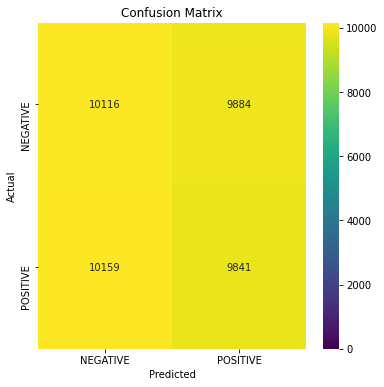

In [22]:
# predicted y values
y_pred = np.squeeze((model.predict(test_dataset) >= 0.5).astype(np.int))
cm = confusion_matrix(test_dataset.labels, y_pred)
clr = classification_report(test_dataset.labels, y_pred, target_names=["NEGATIVE", "POSITIVE"])
    
plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt='g', vmin=0, cmap='viridis', cbar='Blues')
plt.xticks(ticks=np.arange(2) + 0.5, labels=["NEGATIVE", "POSITIVE"])
plt.yticks(ticks=np.arange(2) + 0.5, labels=["NEGATIVE", "POSITIVE"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


We got 11749 correct predictions out of 12000 records in test set.

# **Classification Report**

In [23]:
#Classification Report
print("Classification Report:\n----------------------\n", clr)

Classification Report:
----------------------
               precision    recall  f1-score   support

    NEGATIVE       0.50      0.51      0.50     20000
    POSITIVE       0.50      0.49      0.50     20000

    accuracy                           0.50     40000
   macro avg       0.50      0.50      0.50     40000
weighted avg       0.50      0.50      0.50     40000



# **Check For Your Own Image**

In [ ]:

# We have trained our prediction model with almost 98% accuracy on the validiation dataset

#Let us test our model on some randomly selected images

In [24]:
def display_prediction_stats(probability_of_crack):
  print("Probability that the sample has a Crack =", probability_of_crack)
  if probability_of_crack >= 0.5:
    print("Crack Detected !")
  else:
    print("No Crack Detected !")

In [50]:
img=image.load_img('../input/data-check/1_fofodl_HDFwrvhvxF9Sh0g.jpeg',target_size=(128,128))

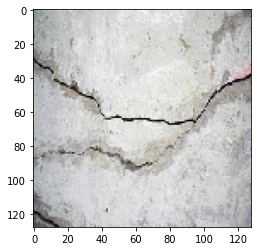

In [26]:
plt.imshow(img)

In [27]:
img1=image.img_to_array(img)
img1=img1/255

In [28]:
img1=np.expand_dims(img1,[0])
print(img1.shape)

(1, 128, 128, 3)


In [29]:
#prediction
prediction = model.predict(img1)

print(prediction[0][0])
display_prediction_stats(prediction[0][0])

1.0
Probability that the sample has a Crack = 1.0
Crack Detected !


In [ ]:
#Save Model
tf.keras.models.save_model(model,'my_model2.hdf5')